In [185]:
SEED = 123      # modifiable seed
CLF_SS = 1      # sub-sample model types for faster run
TARGETS = -1    # which target (0-4) to predict; -1 for all
n_jobs = 8

In [186]:
import numpy as np  
import pandas as pd 
import pickle
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = (15,5.5)

pd.options.display.max_rows = 150

In [1]:
# path = '../input/trends-assessment-prediction'

# loading =  pd.read_csv(path+ '/' + 'loading.csv').set_index('Id')
# loading_cols = loading.columns
# loading_index = loading.index
# fnc =  pd.read_csv(path+ '/' + 'fnc.csv').set_index('Id')
# fnc_cols = fnc.columns
# fnc_index = fnc.index

# assert len(loading) == len(fnc)


In [187]:
sub0 = pd.read_csv('submission/kernel_brend.csv')
sub00 = pd.read_csv('submission/final_submit.csv')

sub1 = pd.read_csv('submission/submission_raw.csv')
sub11 = pd.read_csv('submission/submission_raw1.csv')

sub2 = pd.read_csv('submission/submission_icapca.csv')
sub22 = pd.read_csv('submission/submission_icapca1.csv')

In [188]:
def sub2test(sub0):
    sub0["target"] = sub0.index % 5
    test0 = pd.DataFrame()
    for i in range(5):
        test0 = pd.concat([test0, sub0[sub0["target"]==i]["Predicted"].reset_index(drop=True)], axis=1)
    test0.columns = ["age", "domain1_var1", "domain1_var2" , "domain2_var1" , "domain2_var2"]
    return test0

In [189]:
test0 = sub2test(sub0)
test00 = sub2test(sub00)

test1 = sub2test(sub1)
test11 = sub2test(sub11)

test2 = sub2test(sub2)
test22 = sub2test(sub22)

In [190]:
test0.describe()

,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2
count,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000
mean,49.781797,51.483157,59.260684,47.255392,51.925355
std,10.170031,3.223357,0.920842,2.494695,2.120464
min,23.186089,40.114489,55.838499,39.106759,42.680616
25%,41.972999,49.250268,58.635018,45.469042,50.461398
50%,49.485050,51.519889,59.274770,47.199956,51.894734
75%,57.262351,53.721677,59.866210,48.975973,53.337821
max,81.050589,62.510440,63.316267,57.592795,60.169613


In [191]:
test00.describe()

,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2
count,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000
mean,49.586651,51.489124,59.265761,47.219359,51.938732
std,10.198436,3.224529,0.904860,2.479128,2.079604
min,22.904950,40.117512,55.917716,39.061017,43.523060
25%,41.758514,49.257274,58.654829,45.447462,50.507011
50%,49.289072,51.529944,59.284839,47.168493,51.901366
75%,57.085060,53.724894,59.862713,48.933279,53.335931
max,80.950631,62.540192,63.003209,56.259955,59.961329


In [42]:
test1.describe()

,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2
count,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000
mean,51.879996,51.972564,51.939039,51.991149,51.923730
std,6.517158,6.420042,6.549393,6.498859,6.492273
min,28.763114,30.167048,27.999157,29.815737,28.360126
25%,48.008951,48.105210,48.017368,48.186573,48.148742
50%,51.743363,51.734545,51.759098,51.862426,51.793802
75%,56.975586,56.968353,57.186780,57.121973,56.923231
max,77.963773,73.229957,75.527383,79.074887,80.423113


In [43]:
test2.describe()

,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2
count,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000
mean,51.793052,51.890351,51.881593,51.917124,51.864977
std,6.368240,6.268707,6.371052,6.347153,6.332979
min,29.243668,29.969549,29.494011,28.841923,29.564962
25%,48.095658,48.071378,48.077328,48.126481,48.135824
50%,51.778967,51.793174,51.822792,51.888296,51.824060
75%,57.423753,57.600907,57.631195,57.819938,57.647305
max,73.413534,70.754482,71.732460,73.237774,75.130131


In [192]:
ttt = (test0 + test00 + test1 + test2+ test22) / 5
ttt.describe()

,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2
count,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000
mean,50.960630,51.736429,54.838233,50.058953,51.903493
std,5.616961,3.973037,3.841900,3.935532,3.869530
min,32.187665,38.056038,41.765165,36.998660,38.964102
25%,47.055150,49.226287,52.489284,47.653560,49.594637
50%,51.055114,51.661783,54.780026,49.977242,51.836308
75%,54.830865,54.615792,58.097828,53.084805,54.909734
max,71.531495,65.574972,67.664243,66.022069,67.826688


In [161]:
test1.describe()

,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2
count,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000
mean,51.879996,51.972564,51.939039,51.991149,51.923730
std,6.517158,6.420042,6.549393,6.498859,6.492273
min,28.763114,30.167048,27.999157,29.815737,28.360126
25%,48.008951,48.105210,48.017368,48.186573,48.148742
50%,51.743363,51.734545,51.759098,51.862426,51.793802
75%,56.975586,56.968353,57.186780,57.121973,56.923231
max,77.963773,73.229957,75.527383,79.074887,80.423113


In [162]:
# test = test1.copy()
# test["domain1_var1"] = test22.loc[:, "domain1_var1"]
# test["domain2_var2"] = test11.loc[:, "domain2_var2"]
# test.describe()

In [193]:
train_prob_site2 = pd.read_csv('adversal/train_prob_site2_icapca.csv')
test_prob_site2 = pd.read_csv('adversal/test_prob_site2_icapca.csv')
train_is_site2_id = train_prob_site2[train_prob_site2["is_site2"]==True]["Id"]
test_is_site2_id = test_prob_site2[test_prob_site2["is_site2"]==True]["Id"]
# test_is_site2_idx = test_prob_site2["is_site2"]==True

In [194]:
test_prob_site2.sum()

Id                                                        93123022
prob_site2                                                 2087.98
is_site2                                                      2515
is_site2_true    unknowunknowunknowunknow1.0unknow1.0unknowunkn...
dtype: object

In [195]:
std = 0.004757923173416897
mean = 0.3651777575915719
reveal = test_prob_site2["is_site2_true"] == "1.0"
thred = mean - std
test_prob_site2["is_site2"] = test_prob_site2["prob_site2"] > thred
test_prob_site2.loc[reveal, "is_site2"] = True
test_is_site2_idx = test_prob_site2["is_site2"]==True
print(sum(test_is_site2_idx))
test_prob_site2.sum()


1096


Id                                                        93123022
prob_site2                                                 2087.98
is_site2                                                      1096
is_site2_true    unknowunknowunknowunknow1.0unknow1.0unknowunkn...
dtype: object

In [196]:
test_fin = test0.copy()
test_fin.iloc[test_is_site2_idx.values] = ttt.iloc[test_is_site2_idx.values]

In [167]:
test0.describe()

,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2
count,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000
mean,49.781797,51.483157,59.260684,47.255392,51.925355
std,10.170031,3.223357,0.920842,2.494695,2.120464
min,23.186089,40.114489,55.838499,39.106759,42.680616
25%,41.972999,49.250268,58.635018,45.469042,50.461398
50%,49.485050,51.519889,59.274770,47.199956,51.894734
75%,57.262351,53.721677,59.866210,48.975973,53.337821
max,81.050589,62.510440,63.316267,57.592795,60.169613


In [197]:
test_fin.index = test_prob_site2["Id"]
test_fin.describe()

,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2
count,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000
mean,50.118197,51.571132,58.423891,47.836239,51.916767
std,9.394965,3.371158,2.499538,3.022516,2.558774
min,23.186089,38.056038,42.452862,37.084648,39.398014
25%,43.348100,49.275626,58.236379,45.766935,50.345045
50%,50.032860,51.576191,59.088973,47.641472,51.874267
75%,56.745525,53.890453,59.762552,49.631326,53.472045
max,81.050589,63.663385,66.922117,65.604041,63.298662


In [198]:
test_fin

,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2
Id,,,,,
10003,57.022892,49.511588,59.320502,50.715144,56.687066
10006,64.127615,54.295194,58.873791,49.248570,51.639745
10010,37.733606,49.465522,59.424735,44.757125,52.964931
10011,53.855018,55.381674,51.218018,49.167158,47.993381
10012,58.254657,50.209967,54.995722,48.595575,60.245581
...,...,...,...,...,...
21745,40.267832,51.185186,58.823182,45.855154,52.970228
21748,56.001006,56.263866,60.123545,47.673683,52.103568
21749,48.290989,50.176644,56.046927,48.611646,53.608392


In [199]:
# list1 = os.listdir(config.root_test_path)
# list2 = sorted(list1)
# test_df["Id"] = list2
# test_df["Id"] = test_df["Id"].map(lambda x: x[:-4])
# test_df.set_index("Id", drop=True, inplace=True)
# submission_file = f'ensemble/test_{r_type}_No{file_No}.csv'
# test_df.to_csv(submission_file)

# %%
# for i in range(5):
#     test_df.rename(columns={test_df.columns[i]:config.target[i]}, inplace=True)
df_long = test_fin.stack().reset_index()
df_long.rename(columns={'level_1': 'target', 0: 'Predicted'}, inplace=True)
df_long["Id"] = df_long["Id"].astype(str) + "_" + df_long["target"]
df_long.drop("target", axis=1, inplace=True)
submission_file = f'submission/submission_ense_plas.csv'
print(submission_file)
df_long.to_csv(submission_file, index=False)
df_long

submission/submission_ense_plas.csv


,Id,Predicted
0,10003_age,57.022892
1,10003_domain1_var1,49.511588
2,10003_domain1_var2,59.320502
3,10003_domain2_var1,50.715144
4,10003_domain2_var2,56.687066
...,...,...
29380,21753_age,45.133452
29381,21753_domain1_var1,43.594905
29382,21753_domain1_var2,59.823970
29383,21753_domain2_var1,45.915744


In [171]:
sum(df_long.index == sub0.index)

29385

In [153]:
b = pd.read_csv(submission_file)
b

,Id,Predicted
0,10003_age,57.022892
1,10003_domain1_var1,49.511588
2,10003_domain1_var2,59.320502
3,10003_domain2_var1,50.715144
4,10003_domain2_var2,56.687066
...,...,...
29380,21753_age,45.133452
29381,21753_domain1_var1,43.594905
29382,21753_domain1_var2,59.823970
29383,21753_domain2_var1,45.915744


In [203]:
ex = df_long -  sub0
test_ex = sub2test(ex)
# test_ex.iloc[test_is_site2_idx.values].describe()
test_ex.describe()

,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2
count,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000
mean,0.336400,0.087975,-0.836793,0.580847,-0.008589
std,3.226526,1.804836,2.396701,2.124431,1.785217
min,-21.961076,-13.979974,-17.465957,-10.230105,-13.742347
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.341335,14.470038,7.003687,15.269445,12.780758


In [154]:
ex = df_long -  sub0
test_ex = sub2test(ex)
test_ex.iloc[test_is_site2_idx.values].describe()

,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,2.487633,0.649212,-5.960856,4.181400,-0.046685
std,9.738687,5.544845,5.072671,5.374857,5.498413
min,-29.311577,-18.818929,-23.185325,-13.493962,-18.526043
25%,-3.731468,-3.012146,-8.993026,0.925657,-3.344686
50%,2.646844,0.691843,-6.179851,4.154517,-0.052652
75%,9.543187,4.532386,-1.844437,8.007197,3.973183
max,28.258780,19.389397,9.420651,20.420441,17.087480


In [175]:
ex = df_long -  sub0
test_ex = sub2test(ex)
test_ex.iloc[test_is_site2_idx.values].describe()

,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,1.803851,0.471739,-4.487072,3.114631,-0.046054
std,7.294881,4.159192,3.798741,4.039778,4.135260
min,-21.961076,-13.979974,-17.465957,-10.230105,-13.742347
25%,-2.894438,-2.235789,-6.816851,0.691118,-2.519341
50%,1.901500,0.554161,-4.603805,3.131588,-0.059215
75%,7.035660,3.393349,-1.338290,5.973707,3.019881
max,21.341335,14.470038,7.003687,15.269445,12.780758


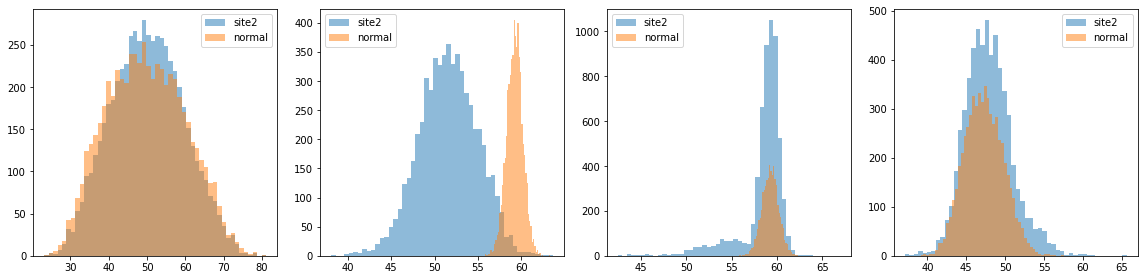

In [212]:
plt.figure(figsize=(16, 4))
plt.subplot(1,4,1)
_=plt.hist(test_fin["age"], bins=50, alpha=0.5, label="site2")
_=plt.hist(test0["age"], bins=50, alpha=0.5, label="normal")
plt.legend()
plt.subplot(1,4,2)
_=plt.hist(test_fin["domain1_var1"], bins=50, alpha=0.5, label="site2")
_=plt.hist(test0["domain1_var2"], bins=50, alpha=0.5, label="normal")
plt.legend()
plt.subplot(1,4,3)
_=plt.hist(test_fin["domain1_var2"], bins=50, alpha=0.5, label="site2")
_=plt.hist(test0["domain1_var2"], bins=50, alpha=0.5, label="normal")
plt.legend()
plt.subplot(1,4,4)
_=plt.hist(test_fin["domain2_var1"], bins=50, alpha=0.5, label="site2")
_=plt.hist(test0["domain2_var1"], bins=50, alpha=0.5, label="normal")
plt.legend()
plt.tight_layout()
